In [1]:
import qutip as qt
import matplotlib.pyplot as plt
import numpy as np

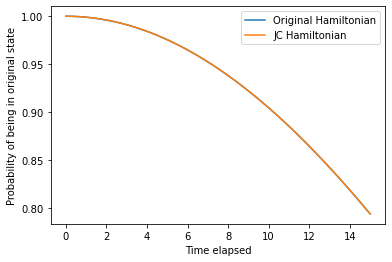

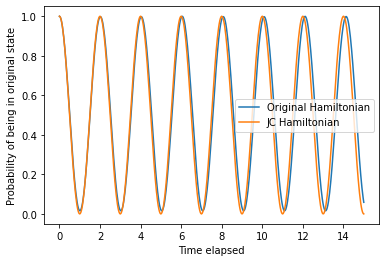

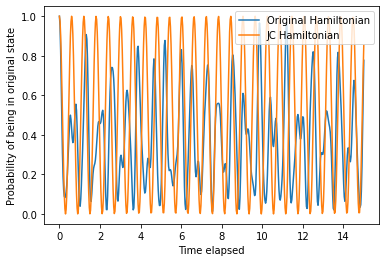

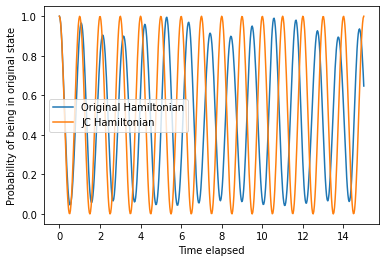

In [2]:
# Problem 1
N = 12

def H(g):
    return np.pi * qt.tensor(qt.sigmaz(), qt.qeye(N)) + \
           np.pi * qt.tensor(qt.qeye(2), (2 * qt.num(N) + qt.qeye(N))) + \
           (g / 2) * qt.tensor(qt.sigmax(), qt.destroy(N) + qt.create(N))

def U(t, n, g):
    Omega = g * np.sqrt(n + 1)
    return np.cos(Omega * t / 2) * qt.qeye(2) - 1j * np.sin(Omega * t / 2) * qt.sigmax()

for (n, g) in zip([0, 0, 10, 0], [np.pi / 50, np.pi, np.pi, 2 * np.pi]):
    times = np.linspace(0, 15, 500)
    
    Psi = qt.tensor(qt.basis(2, 0), qt.basis(N, n))
    states = [(-1j * t * H(g)).expm() * Psi for t in times]
    probs = [qt.expect(Psi.proj(), s) for s in states]
    plt.plot(times, probs, label="Original Hamiltonian")
    
    Psi = qt.basis(2, 1)
    states = [U(t, n, g) * Psi for t in times]
    probs = [qt.expect(Psi.proj(), s) for s in states]
    plt.plot(times, probs, label="JC Hamiltonian")
    
    
    plt.ylabel("Probability of being in original state")
    plt.xlabel("Time elapsed")
    plt.legend()
    plt.show()

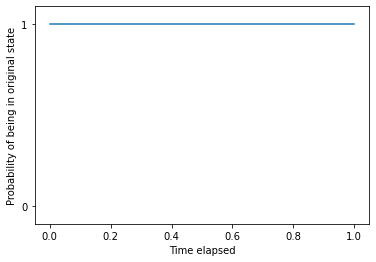

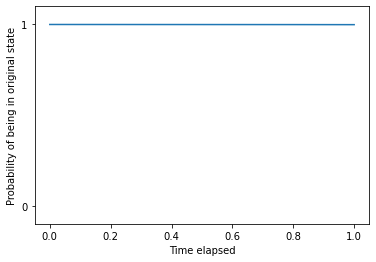

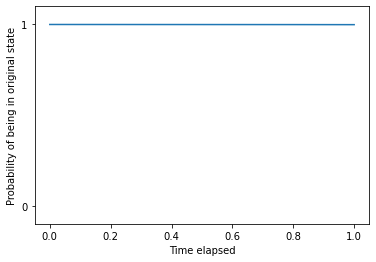

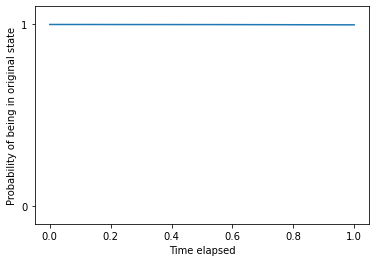

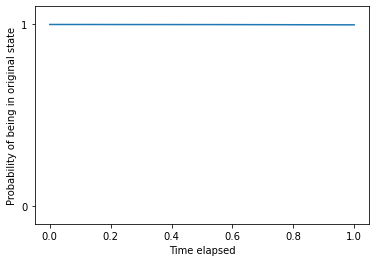

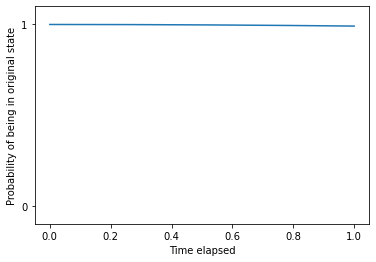

In [3]:
# Problem 2
N = 10
original_states = [
    qt.ket("110", [2, 2, N]),
    qt.ket("010", [2, 2, N]),
    qt.ket("100", [2, 2, N]),
    qt.ket("000", [2, 2, N]),
    (qt.ket("010", [2, 2, N]) + qt.ket("100", [2, 2, N])).unit(),
    qt.ket("019", [2, 2, N])
]
H = np.pi * qt.tensor(qt.sigmaz(), qt.qeye(2), qt.qeye(N)) + \
    np.pi * qt.tensor(qt.qeye(2), qt.sigmaz(), qt.qeye(N)) + \
    np.pi * qt.tensor(qt.qeye(2), qt.qeye(2), (2 * qt.num(N) + qt.qeye(N))) + \
    (np.pi / 100) * qt.tensor(qt.sigmap(), qt.qeye(2), qt.destroy(N)) + \
    (np.pi / 100) * qt.tensor(qt.qeye(2), qt.sigmap(), qt.destroy(N)) + \
    (np.pi / 100) * qt.tensor(qt.sigmam(), qt.qeye(2), qt.create(N)) + \
    (np.pi / 100) * qt.tensor(qt.qeye(2), qt.sigmam(), qt.create(N))

for Psi in original_states:
    times = np.linspace(0, 1, 200)
    states = [(-1j * t * H).expm() * Psi for t in times]
    probs = [qt.expect(Psi.proj(), s) for s in states]
    plt.plot(times, probs)
    plt.ylim(-.1, 1.1)
    plt.yticks([0, 1])
    plt.ylabel("Probability of being in original state")
    plt.xlabel("Time elapsed")
    plt.show()

In [6]:
# Problem 3
def XX(chi):
    return np.cos(chi) * qt.tensor(qt.qeye(2), qt.qeye(2)) - \
      1j * np.sin(chi) * qt.tensor(qt.sigmax(), qt.sigmax())

s = 1
v = 1

def RX(phi):
    return (-1j * phi * qt.sigmax() / 2).expm()
def RY(phi):
    return (-1j * phi * qt.sigmay() / 2).expm()

cnot = qt.tensor(RY(v * np.pi / 2), qt.qeye(2))
cnot = XX(s * np.pi / 4) * cnot
cnot = qt.tensor(RX(-1 * s * np.pi / 2), RX(-1 * v * s * np.pi / 2)) * cnot
cnot = qt.tensor(RY(-1 * v * np.pi / 2), qt.qeye(2)) * cnot

print(cnot)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 7.07106781e-01+7.07106781e-01j  1.23259516e-32-1.96261557e-17j
   7.85046229e-17+9.81307787e-17j -7.85046229e-17-5.55111512e-17j]
 [ 3.92523115e-17-9.81307787e-17j  7.07106781e-01+7.07106781e-01j
  -1.17756934e-16-5.55111512e-17j  7.85046229e-17+9.81307787e-17j]
 [ 1.11022302e-16+4.87765193e-17j -1.57009246e-16-1.37383090e-16j
   1.57009246e-16-1.37383090e-16j  7.07106781e-01+7.07106781e-01j]
 [-1.57009246e-16-1.37383090e-16j  7.17699910e-17+9.52420783e-18j
   7.07106781e-01+7.07106781e-01j  2.35513869e-16-1.76635402e-16j]]


In [5]:
np.matrix([
    [1+1j, -1+1j, 1+1j, -1+1j],
    [-1+1j, 1+1j, -1+1j, 1+1j],
    [-1+1j, -1-1j, 1-1j, 1+1j],
    [-1-1j, -1+1j, 1+1j, 1-1j]
]) @ np.matrix([
    [1, -1j, -1, -1j],
    [-1j, 1, -1j, -1],
    [1, -1j, 1, 1j],
    [-1j, 1, 1j, 1],
])

matrix([[4.+4.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 4.+4.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 4.+4.j],
        [0.+0.j, 0.+0.j, 4.+4.j, 0.+0.j]])